In [2]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ["dlopen(/Users/mmenen

In [40]:
path_images = "Yo/"
new_path_images = "Yo/processed"
list_images = tf.io.gfile.listdir(path_images)
list_images = [img for img in list_images if not img.endswith("Store")]
images = {
    tf.io.gfile.join(path_images, img): tf.io.gfile.join(new_path_images, img)
    for img in list_images
}

if not tf.io.gfile.exists(new_path_images):
    tf.io.gfile.mkdir(new_path_images)

In [41]:
for img, new_img in images.items():
    print(img)
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = tf.convert_to_tensor(image, dtype=tf.uint8)

    min_dim = tf.reduce_min(image.shape[:-1])
    orig_area = image.shape[0] * image.shape[1]
    new_area = min_dim**2
    fraction = new_area / orig_area

    image = tf.image.resize_with_crop_or_pad(image, min_dim, min_dim)
    image = tf.image.resize(
        image, size=[512, 512], preserve_aspect_ratio=True, method="nearest"
    )

    tf.keras.utils.save_img(new_img, image)

Yo/20230729_155526.jpg
Yo/IMG-20230101-WA0104.jpg
Yo/IMG-20230101-WA0105.jpg
Yo/20231021_195654.jpg
Yo/20191124_060010.jpg
Yo/20230624_084619.jpg
Yo/20231021_202812.jpg
Yo/20231021_195916.jpg
Yo/20230624_084618.jpg
Yo/20231021_200141.jpg
Yo/20220820_131128.jpg
Yo/20231021_195914.jpg
Yo/IMG-20220718-WA0023.jpeg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Yo/FB_IMG_1570998625817.jpg
Yo/IMG-20220713-WA0017.jpeg
Yo/IMG-20230101-WA0103.jpg
Yo/20230119_121703.png
Yo/20230805_084703.jpg
Yo/20230805_084703(0).jpg
Yo/IMG-20220112-WA0021.jpeg


Invalid SOS parameters for sequential JPEG


Yo/20221229_141126.jpg
Yo/20211119_193643.jpg
Yo/20211119_193642.jpg
Yo/20230729_155341.jpg
Yo/20230805_090605.jpg
Yo/20211119_193646.jpg
Yo/IMG-20210902-WA0037.jpeg
Yo/20211119_193645.jpg
Yo/20230805_090613.jpg
Yo/20230603_211914.jpg
Yo/20200816_205318.jpg
Yo/IMG-20220112-WA0019.jpeg
Yo/20230603_211915.jpg
Yo/20231021_200139.jpg


Invalid SOS parameters for sequential JPEG


Yo/20220501_150625.jpg
Yo/20230630_203407.jpg
Yo/20230805_084651.jpg
Yo/IMG-20210902-WA0035.jpeg
Yo/20230603_211913.jpg
Yo/IMG-20220808-WA0002.jpeg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Yo/IMG-20220710-WA0002.jpeg
Yo/20230630_203415.jpg
Yo/20200816_205321.jpg
Yo/20230805_084653.jpg
Yo/IMG-20220111-WA0034.jpeg
Yo/20231021_195924.jpg


Invalid SOS parameters for sequential JPEG


Yo/20231021_195918.jpg
Yo/20230813_140412.jpg
Yo/20230805_084757.jpg
Yo/20230624_084629.jpg
Yo/20231021_195933.jpg
Yo/20230729_155511.jpg
Yo/20230228_161204.jpg
Yo/20231006_204025.jpg
Yo/processed


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


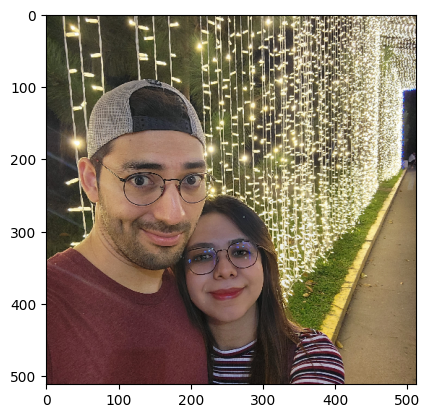

In [29]:
plt.imshow(image)